#Практическая работа №1
##Предварительная обработка данных

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.impute
from scipy.stats import sigmaclip

In [159]:
data = pd.read_excel("C:\\Users\\fongr\\Documents\\Мои документы\\Второй курс\\python\\scientificProject\\data\\first_practice_dataframe.xlsx", sheet_name="Sheet1")
PROFICIENCY_LEVEL = "cat10_proficiencyLevel"
AGE = "cat9_age"
NUM_1 = "num1_24"
NUM_2 = "num2_24"
NUM_3 = "num3_24"
headers = [PROFICIENCY_LEVEL, AGE, NUM_1, NUM_2, NUM_3]
frame = pd.DataFrame(data[headers])
print(frame)

    cat10_proficiencyLevel            cat9_age      num1_24      num2_24  \
0                 Advanced      below 21 years   907.348256   242.734013   
1                   Novice  59 years and above   962.219776  1035.400665   
2                   Novice  59 years and above  1053.680910  -469.064161   
3                 Advanced  59 years and above  1148.702980  2793.294228   
4                 Advanced  59 years and above  1018.119147  -954.043533   
..                     ...                 ...          ...          ...   
995               Advanced      below 21 years   815.379375  -154.418945   
996                 novice  59 years and above  1195.478914  -572.061291   
997                 Novice      21 to 35 years   762.115010  -596.334731   
998                 Novice  59 years and above   730.372126 -1101.408593   
999               Advanced      36 to 58 years  1015.521911   838.290002   

        num3_24  
0    971.167308  
1    933.449443  
2    950.209325  
3    942.957073

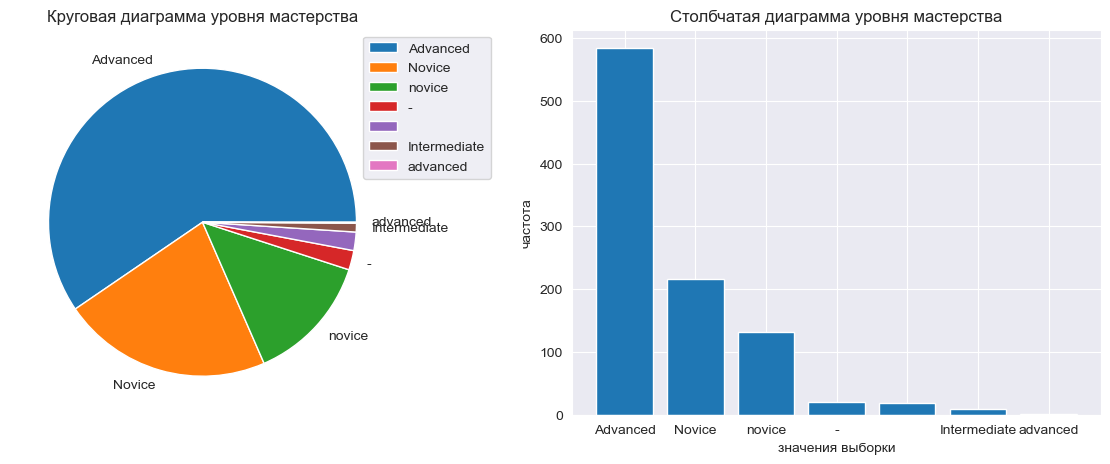

In [160]:
proficiency = frame[PROFICIENCY_LEVEL].value_counts()

fig = plt.figure(figsize=(15, 5))

# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

ax.pie(proficiency.values, labels=proficiency.index)
ax.legend(bbox_to_anchor=(0.9, 1))
ax.set_title("Круговая диаграмма уровня мастерства")
ax2.bar(x=proficiency.index, height=proficiency.values)
ax2.set_title("Столбчатая диаграмма уровня мастерства")
plt.setp([ax2], xlabel='значения выборки', ylabel='частота')
plt.show()

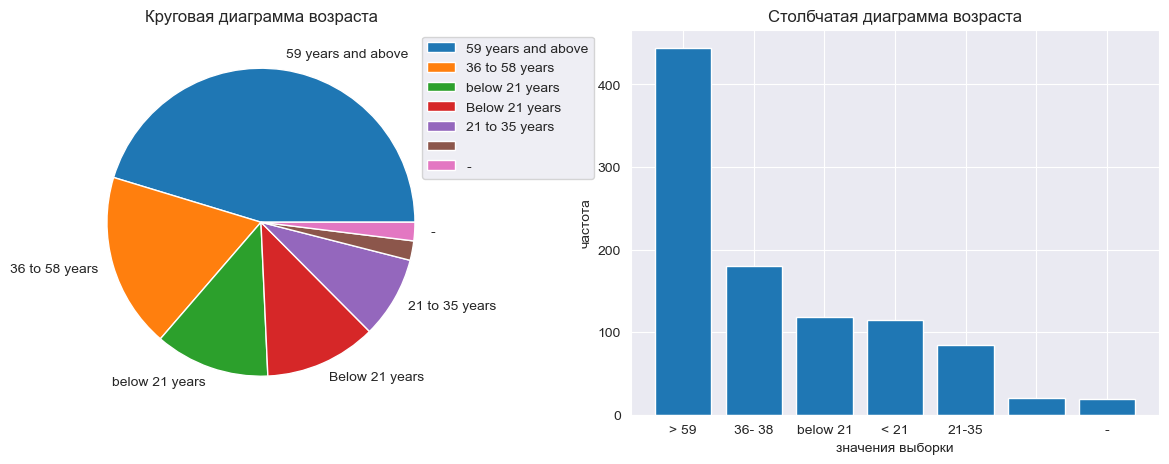

In [161]:
age = frame[AGE].value_counts()

fig = plt.figure(figsize=(15, 5))

# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

ax.pie(age.values, labels=age.index)
ax.legend(bbox_to_anchor=(0.9, 1))
ax.set_title("Круговая диаграмма возраста")
ax2.bar(x=age.index, height=age.values)
ax2.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax2.set_xticklabels(['> 59', '36- 38', 'below 21', '< 21', '21-35', "", "-"])
ax2.set_title("Столбчатая диаграмма возраста")
plt.setp([ax2], xlabel='значения выборки', ylabel='частота')
plt.show()

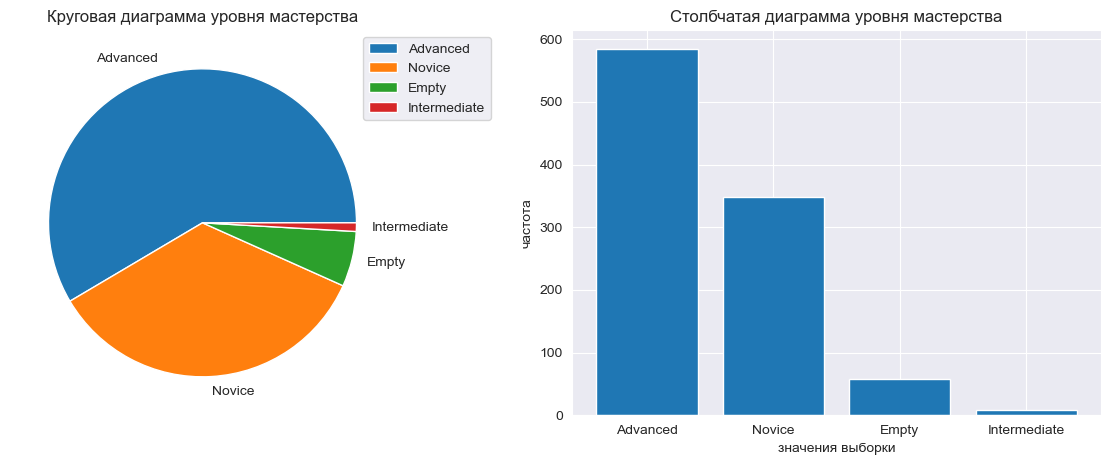

In [162]:
frame.loc[frame[PROFICIENCY_LEVEL]=='-', PROFICIENCY_LEVEL] = "Empty"
frame.loc[frame[PROFICIENCY_LEVEL]=='', PROFICIENCY_LEVEL] = "Empty"
frame.loc[frame[PROFICIENCY_LEVEL]==' ', PROFICIENCY_LEVEL] = "Empty"
frame.loc[frame[PROFICIENCY_LEVEL]=='novice', PROFICIENCY_LEVEL] = "Novice"
frame.loc[frame[PROFICIENCY_LEVEL]=='advanced', PROFICIENCY_LEVEL] = "Advanced"
frame[PROFICIENCY_LEVEL] = frame[PROFICIENCY_LEVEL].fillna("Empty")
proficiency = frame[PROFICIENCY_LEVEL].value_counts()

fig = plt.figure(figsize=(15, 5))

# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

ax.pie(proficiency.values, labels=proficiency.index)
ax.legend(bbox_to_anchor=(0.9, 1))
ax.set_title("Круговая диаграмма уровня мастерства")
ax2.bar(x=proficiency.index, height=proficiency.values)
ax2.set_title("Столбчатая диаграмма уровня мастерства")
plt.setp([ax2], xlabel='значения выборки', ylabel='частота')
plt.show()

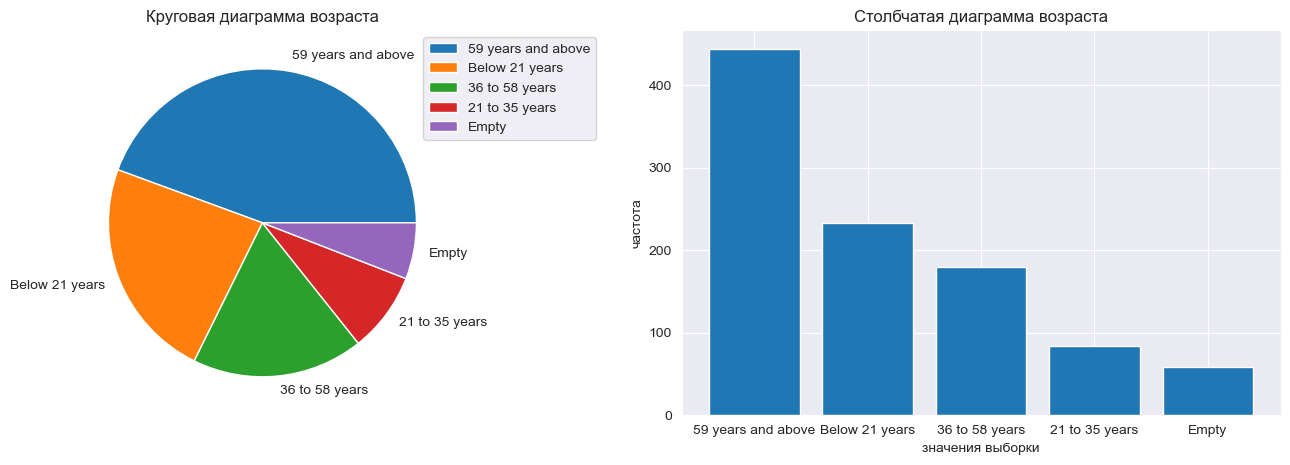

In [163]:
frame.loc[frame[AGE]=='-', AGE] = "Empty"
frame.loc[frame[AGE]=='', AGE] = "Empty"
frame.loc[frame[AGE]==' ', AGE] = "Empty"
frame.loc[frame[AGE]=='below 21 years', AGE] = "Below 21 years"
frame[AGE] = frame[AGE].fillna("Empty")
age = frame[AGE].value_counts()

fig = plt.figure(figsize=(17, 5))

# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

ax.pie(age.values, labels=age.index)
ax.legend(bbox_to_anchor=(0.9, 1))
ax.set_title("Круговая диаграмма возраста")
ax2.bar(x=age.index, height=age.values)
ax2.set_title("Столбчатая диаграмма возраста")
plt.setp([ax2], xlabel='значения выборки', ylabel='частота')
plt.show()

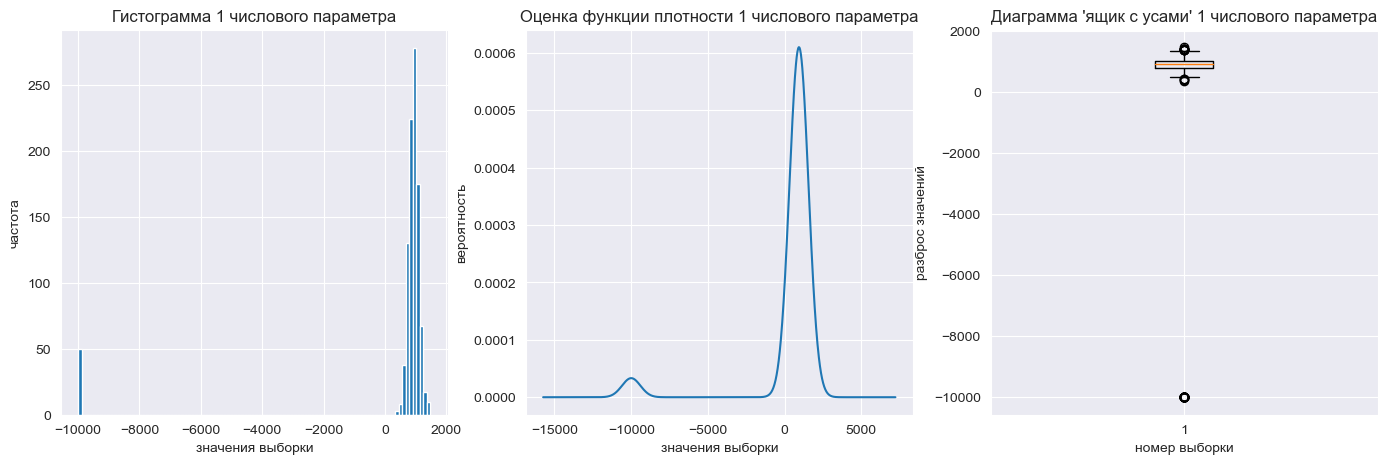

In [164]:
num1 = frame[NUM_1]
n_bins = len(num1)
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)
ax.hist(num1, bins=100)
ax.set_title("Гистограмма 1 числового параметра")
ax2.boxplot(x=num1)
ax3.set_title("Оценка функции плотности 1 числового параметра")
ax2.set_title("Диаграмма 'ящик с усами' 1 числового параметра")
data[NUM_1].plot.kde()
plt.setp([ax, ax3], xlabel='значения выборки')
plt.setp([ax2], xlabel='номер выборки', ylabel='разброс значений')
plt.setp([ax], ylabel='частота')
plt.setp([ax3], ylabel='вероятность')
plt.show()

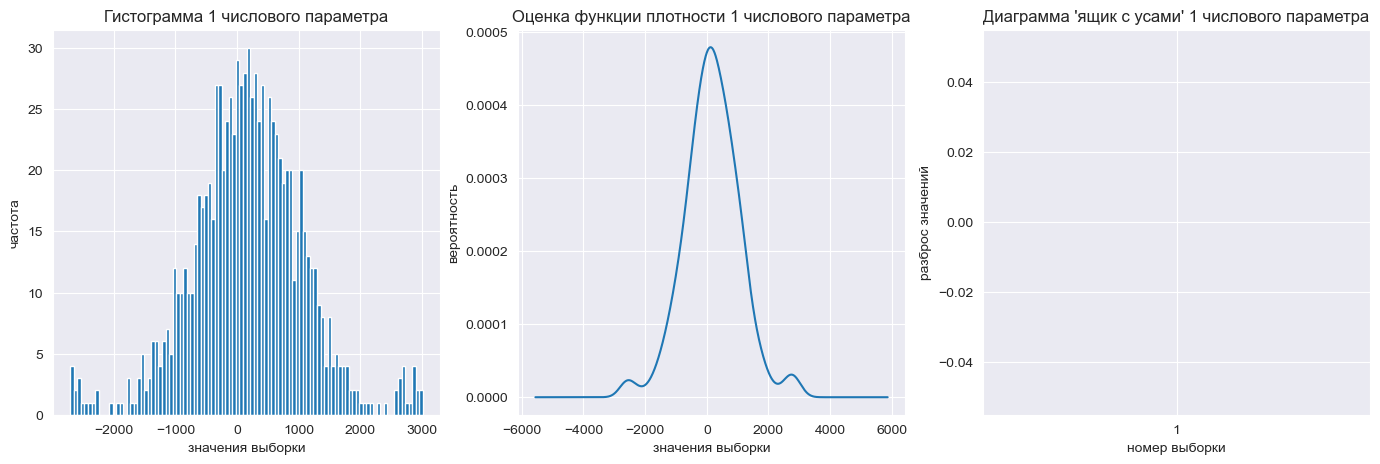

In [165]:
num2 = frame[NUM_2]
# n_bins = len(num2)
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)
ax.hist(num2, bins=100)
ax2.boxplot(x=num2)
num2.plot.kde()
ax.set_title("Гистограмма 1 числового параметра")
ax3.set_title("Оценка функции плотности 1 числового параметра")
ax2.set_title("Диаграмма 'ящик с усами' 1 числового параметра")
plt.setp([ax, ax2, ax3], xlabel='значения выборки')
plt.setp([ax], ylabel='частота')
plt.setp([ax3], ylabel='вероятность')
plt.setp([ax2], xlabel='номер выборки', ylabel='разброс значений')
plt.show()

In [166]:
frame.loc[frame[NUM_3]=='-', NUM_3] = float('nan')
frame.loc[frame[NUM_3]=='', NUM_3] = float('nan')
frame.loc[frame[NUM_3]==' ', NUM_3] = float('nan')
frame[NUM_3].astype(np.float64, errors='raise')
frame.info()
frame[NUM_3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cat10_proficiencyLevel  1000 non-null   object 
 1   cat9_age                1000 non-null   object 
 2   num1_24                 1000 non-null   float64
 3   num2_24                 950 non-null    float64
 4   num3_24                 916 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


0      971.167308
1      933.449443
2      950.209325
3      942.957073
4      947.163814
          ...    
995    961.201375
996    954.136037
997    955.746237
998    953.369459
999    952.558506
Name: num3_24, Length: 1000, dtype: object

C:\Users\fongr\anaconda3\envs\scientificProject\lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\fongr\anaconda3\envs\scientificProject\lib\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\fongr\anaconda3\envs\scientificProject\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\fongr\anaconda3\envs\scientificProject\lib\site-packages\matplotlib\cbook\__init__.py:1298: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\fongr\anaconda3\envs\scientificProject\lib\site-packages\matplotlib\cbook\__init__.py:1306: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\fongr\anaconda3\envs\scientificProject\lib\site-packages\matplotlib\cbook\__init

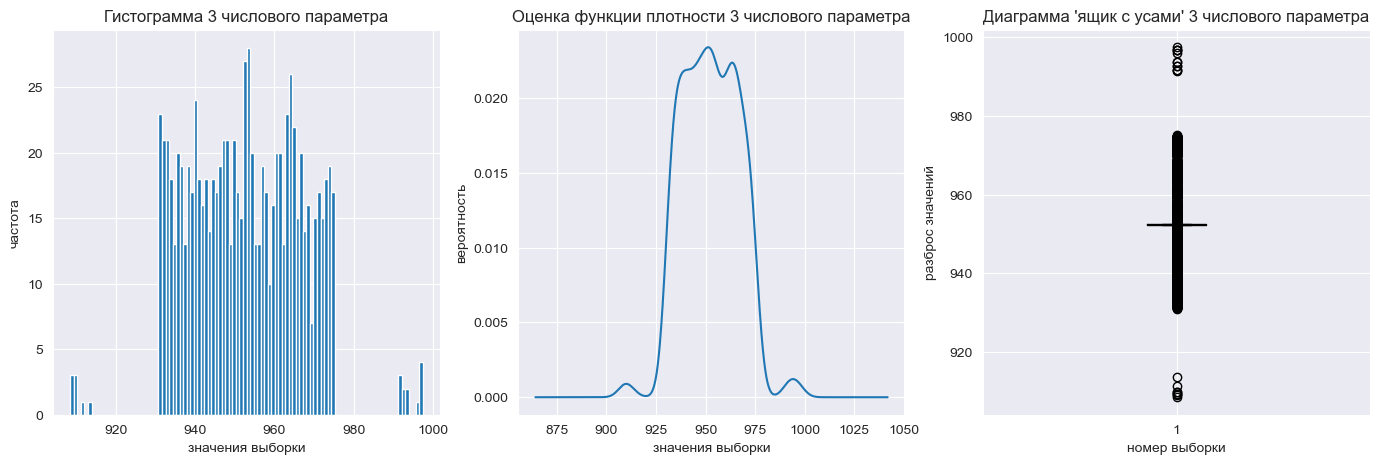

In [167]:
num3 = frame[NUM_3]
# n_bins = len(num2)
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)
ax.hist(num3, bins=100)
ax2.boxplot(x=num3)
num3.plot.kde()
ax.set_title("Гистограмма 3 числового параметра")
ax3.set_title("Оценка функции плотности 3 числового параметра")
ax2.set_title("Диаграмма 'ящик с усами' 3 числового параметра")
plt.setp([ax, ax2, ax3], xlabel='значения выборки')
plt.setp([ax], ylabel='частота')
plt.setp([ax3], ylabel='вероятность')
plt.setp([ax2], xlabel='номер выборки', ylabel='разброс значений')
plt.show()

Поиск аномальных значений в исходном наборе

C:\Users\fongr\anaconda3\envs\scientificProject\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\fongr\anaconda3\envs\scientificProject\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\fongr\anaconda3\envs\scientificProject\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\fongr\anaconda3\envs\scientificProject\lib\site-packages\scipy\stats\_stats_py.py:3435: RuntimeWarning: Mean of empty slice.
  c_mean = c.mean()
C:\Users\fongr\anaconda3\envs\scientificProject\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\fongr\anaconda3\envs\scientificPr

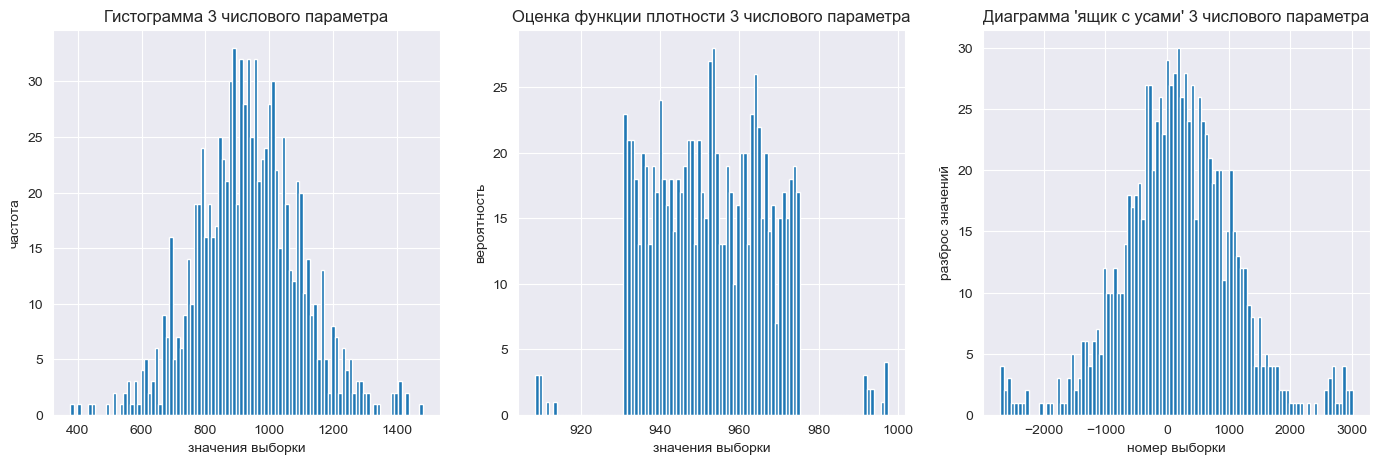

In [168]:
a, b, c = sigmaclip(frame[NUM_1], 4, 4)
d, e, o = sigmaclip(frame[NUM_2], 6, 6)
#sigmaclip(frame[NUM_3], 4, 4)
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)
ax.hist(a, bins=100)
ax2.hist(frame[NUM_2], bins=100)
ax3.hist(frame[NUM_3], bins=100)
ax.set_title("Гистограмма 3 числового параметра")
ax3.set_title("Оценка функции плотности 3 числового параметра")
ax2.set_title("Диаграмма 'ящик с усами' 3 числового параметра")
plt.setp([ax, ax2, ax3], xlabel='значения выборки')
plt.setp([ax], ylabel='частота')
plt.setp([ax3], ylabel='вероятность')
plt.setp([ax2], xlabel='номер выборки', ylabel='разброс значений')
plt.show()

In [169]:
def outlier_estimation(value):
    column = num3
    #me = column.median()
    #mo = column.mode().tolist()[0]
    q25 = column.quantile(0.25)
    q75 = column.quantile(0.75)
    delta = q75 - q25
    inside_border = [(q25 - 1.5 * delta), (q75 + 1.5 * delta)]
    outside_border = [(q25 - 3 * delta), (q75 + 3 * delta)]
    print(inside_border, outside_border)
    if value > outside_border[1] or value < outside_border[0]:
        return 2
    elif value > inside_border[1] or value < inside_border[0]:
        return 1
    else:
        return 0

In [ ]:
median = frame[NUM_2].median()
frame[NUM_2] = frame[NUM_2].fillna(median)
frame[NUM_3] = frame[NUM_3].fillna(median)
frame.info()
frame.loc[frame[AGE]=="Empty", AGE] = "59 years and above"

In [174]:
inputer = sklearn.impute.KNNImputer(n_neighbors=2)
frame = pd.DataFrame(inputer.fit_transform(frame[NUM_1]),columns = frame)
#inputer.fit_transform(frame[NUM_1])
frame[NUM_1]

ValueError: Expected 2D array, got 1D array instead:
array=[  907.34825631   962.21977605  1053.68090954  1148.70297978
  1018.11914675   781.00397018   902.47827691   839.74378056
  1034.99724388   439.14778615  1013.91442724   950.32260558
  1204.54327169   822.24342991  1022.9854235   1044.87232891
   920.78470753  1051.64742176  1076.74207756   773.08992048
   955.22353769  1104.33371491   801.46543322  1213.32303186
  1008.05889423   854.09490672   878.88656796  1021.26691328
 -9999.           997.36137713   893.19075238   847.95886586
   988.8335251    781.70133708   938.21997318   767.58484344
   786.71358815  1018.26158881   614.45382837   975.11271654
   920.02698827   971.93697105   930.05269786   809.79032757
  1030.59693086   874.95551887   979.38631532   982.05300507
   997.77676155   782.28271571   920.14967226  1042.79753458
   777.65326942  1022.54027121   705.13757621   926.30148421
   880.60016606  1078.56325183   988.87531826   710.0066526
 -9999.          1087.48034903   880.41226756   787.07129475
   790.00080533   942.95379814   947.66595407  1090.13496831
   721.07712924 -9999.         -9999.           750.57862035
   731.90489948   920.85502845   971.05842296  1023.26528941
   776.29027611   747.45969439   950.08181235   997.51178131
   766.83014565  1222.56720266  1052.07095515 -9999.
   877.95163496   895.38921149   787.72117304   860.4517654
  1001.79912054   800.37901698   879.3461668    926.49075248
  1146.19549035   730.82078491   643.17469343   953.15143438
  1294.49394658  1012.77212291  1111.24756633   928.33365235
  1193.81488726   869.54531287 -9999.           862.51718919
  1037.05398095  1084.59736388   832.55247985   988.32140922
   914.13392553   767.90372308  1008.68754721  1181.10799611
  1027.83417706   814.28867778   916.49689232   975.09021771
  1074.76461164   744.23408434   968.71441189  1068.81733027
   900.50510093  1071.73658443   744.95778563  1044.76367553
   846.71852338  1012.55549841   875.18508852   716.73953326
  1285.2847931    931.48396269   909.98384066   783.40131211
 -9999.           959.69053325   954.63731501  1043.79327069
  1041.26459167 -9999.           816.44182273   691.76642742
   852.02311108  1061.5364141    709.90206142   842.97552942
  1129.50374185   900.04030055   860.04470957   849.64114788
  1026.31740043   633.42312737   677.30276057   939.14861737
  1004.73707351   811.19014678   873.43613893   857.06929519
   901.7808981   1002.68463475   886.27286311  1045.53334892
   785.95221188   936.76576012  1059.02714886   973.95454863
   687.45630057   913.07041401   820.01555332  1094.06257048
  1010.54446946   962.93204103   966.56296766   561.08687765
   841.86314788  1021.13418683   923.58029709 -9999.
   929.9073123   1006.39081256  1013.15869098  1093.3364527
  1063.20795368   920.19323661   787.36934399  1166.10575473
 -9999.           797.99309011   828.88807117   710.10269756
   752.6934496    839.00146692  1007.85062241  1059.72398019
   973.92897259   894.86311684  1080.30897324  1413.99331597
   856.00580311   407.50751815   667.23154217   791.61397554
   976.04764225   876.6641873    892.4187677   1021.87135
  1071.85032814   907.34633085   686.48807873  1103.658738
   778.22975824   854.22812116   742.58166141   808.47713518
   813.59148888   863.60715559  1007.97226114  1067.32458932
   878.86343438  1152.66387661   915.81802909   954.48274217
  1053.46275037   968.98702805   888.4973424    863.19456594
   849.82286421   918.40545218   583.63644202   977.37704686
   848.05231013   805.89422289  1033.18457341   790.16466286
   948.51521126   934.43742845   953.93959669   918.21982586
   926.88716475  1050.44404868   875.76680401   907.46955138
  1275.72409989   898.237289     843.09577148   680.60497073
   865.26550881  1101.27141717   807.70836034   774.00189212
  1117.54518472   694.87654117   768.75220332   879.54085612
  1144.67324859   768.55101926   673.04446257  1095.34423182
   916.16864898  1114.84098664   780.81010426   817.40986972
   866.13694224   811.56664233   846.49913579   450.73547594
   933.3092291    910.4091026    941.29887317   871.85610625
 -9999.           961.06776226  1040.64217713  1390.78480947
   871.83588881   854.6988091   1046.1956242    880.75323201
  1174.2294848    952.55994832   797.52750409  1029.07411052
  1034.94167721  1084.24424696  1179.16774237   888.95069504
   909.26346146  1004.44411891  1014.38358081  1103.24804596
  1030.43592427  1219.44630671 -9999.           932.75113884
   950.40897675 -9999.           752.73608784   944.0241573
   887.53200949   898.31405838   789.79216771  1168.81862221
  1085.19486284  1165.30043437   772.18911169   983.60116345
   883.10848211  1024.6021667   1098.24076629   912.77152261
   991.56601164   740.80877564 -9999.         -9999.
   880.21443378  1207.16796198  1107.65617927   966.51423347
   820.4630565   1041.68198282   913.79802565   848.43407414
  1160.71979424  1010.26336505  1250.65794949  1014.66844075
   875.94348198   854.89421685  1236.68611751   855.04542009
  1160.357442     934.87754645   931.85243132   574.1122876
   828.72637653   962.26841108   844.40417565  1250.83379205
  1043.80951298   903.56966554   829.32382786  1090.32482073
   563.36303962 -9999.           857.34781657   756.01443466
  1235.27996172  1138.76181971   784.89144239   922.15429386
   648.54638223  1086.30811499   982.14251892  1202.18559883
  1196.06833079   929.80888834   998.48205494   922.15067777
   914.63616329  1013.12117455   988.98787729  1213.50918566
  1433.3296786    903.30739845   920.69482811   991.35197454
  1036.26297832  1200.69627202  1090.74675979  1387.07060997
   955.50250325  1120.65144682   852.5316136    990.6521722
  1227.58828866   799.2844512   1096.05266239  1014.83219464
   961.25529989   935.23250644   713.06040846   998.59238001
   985.40969726   779.58658207   933.00267535   675.89292253
   801.63753938   871.05836776  1061.46612255  1172.29196818
   927.94807047   938.11140016   802.2434562    851.41991815
   798.85325023 -9999.          1083.65267868  1157.44103843
   903.27055672   956.63485998   577.62281694   915.02217166
   578.4750979    912.30747584  1072.74310604   790.35708156
  1039.60822238   861.23033991   790.50351555   895.5666401
   549.06075887  1049.73843008 -9999.          1167.98654752
   997.45787302   985.07441733   833.15272426   920.69237052
   755.70443648   796.98933532  1024.00755854  1132.14532611
   974.9162136   1033.51306213 -9999.           964.16527118
   836.93810041  1004.27297408   939.5662718    966.3146936
   886.82161722  1143.98167363  1016.70719689  1136.56590846
  1103.61091367   848.03954145 -9999.          1295.10105226
   938.34736262   997.05007404  1055.76200399  1093.982312
   964.39232776   995.94738298  1409.40786001   973.77933286
   830.36299202   848.42862685  1279.01354922   891.22336748
   913.22414388   922.06081823  1185.56363775   688.21404517
   673.34952171   938.30801657   764.53835692   984.10370701
  1090.57439096   910.94273819  1089.85638909   831.67524779
   608.78488857  1055.66967355  1094.45634032   973.60231688
  1093.53702608  1030.95316557   982.43186559   730.28508822
 -9999.          1115.67602284   604.03118931  1012.01036951
   686.17801871   849.0928472   1087.54381835 -9999.
  1023.83293592  1028.37836514   767.30544312  1040.75932824
   992.53752059   666.53391485   920.55452619   766.68548079
   905.45717712  1284.6187554    979.97475134   941.3723802
  1052.98359738  1006.40847302   867.37041309   937.87467844
   723.55496847   828.27447516   772.45868855   766.16709068
   824.76220793   840.71560235  1326.90893192  1044.84071099
   931.11892448   876.88337291   957.35740887  1250.96385372
  1136.8184413    876.36903063  1229.26411412   951.63938924
  1150.3688345    699.69676595   805.56348837   956.62136442
   757.81619523   862.05592553   867.46855433  1054.41736818
   894.86256851   986.16808001 -9999.           776.36433175
   689.93969684   941.28021254   626.57429666 -9999.
   997.94261828   886.21742478   894.5735641   1126.3845368
   862.65440912  1109.05382868   825.47402517   798.63119623
   727.7454062    658.89811982   952.13547957   792.75585368
   829.62340169   795.52556806  1024.97903168   924.25668304
  1078.09294779   889.31590638   848.2131366    749.57731757
   912.54786367  1054.70863673  1245.69501332   902.94484944
   754.64984609   887.99481844   933.10025776   823.60281264
   847.65641567  1045.48725295  1023.64651341   937.59242953
  1286.785895     892.0685948    870.26040889  1072.35351775
   665.12747495   936.57771373   915.02139593  1261.83382292
   803.55124971   963.08842978  1119.98564257   894.5847714
   788.54591903   938.05412918  1005.16150232  1014.48930899
   846.60115553 -9999.           925.55256046   807.39332693
   876.56460252   885.03337853  1345.82895751  1132.6291025
  1033.78426141   698.07593865  1072.42470837  1000.45193976
   950.46009155 -9999.           518.98117477   948.00949547
   911.65695955   786.14723759   835.29849631   965.23299716
   974.30010198   778.44248778   647.55190856   759.40755629
  1000.9391432    783.51667542   857.48988274   897.05436341
   901.19953824  1025.84088591 -9999.           750.24653198
  1004.25489353  1103.43126691   564.23251349  1168.82530143
   827.36365267   863.95590203  1122.12280285   782.31473816
  1086.70315834   958.27163468   540.44370197  1095.99131538
   884.11742179   686.41652097  1075.25041667   898.27258901
  1307.41941507  1047.67403907   823.73938198   818.40687543
   610.81420216   885.81822297  1040.28488404   795.09756933
   835.7848221   1046.91051045   741.14922776  1047.52928099
   982.1963843    930.09722809  1250.34599953   377.16727945
   673.02651285   986.26611192  1136.5778409    785.02192489
   689.27330165  1013.39171923   960.30530711  1103.64315238
   892.61605607 -9999.          1012.34806298   950.76768678
   689.44217981   986.41724195   948.21812495   915.88974636
   957.46074727  1275.06114265  1117.1952496   1105.27615432
   930.59844038   752.76407892   670.72105486  1002.16470437
   912.49244958   933.18995505   887.80361697  1146.66487902
   799.0656635    628.46762059  1096.22099557   865.89092633
   924.30172027   722.31888121   917.76164378   682.77851702
   893.76455583   693.61812546   922.29669147   700.58248475
   602.12534922   980.94807258 -9999.           813.3570809
   960.09031893  1059.94973182  1024.07920824 -9999.
   690.26806349  1119.9721907   1146.82615466   951.92574849
  1103.36542665   860.53134208   719.70816454   928.35195288
   918.01912766   953.23267894   873.14723713  1004.0950325
   821.25207332   706.50943686   981.57523666   762.99246819
 -9999.           943.90941882   880.42688536  1261.70755363
  1099.00226389  1015.39220119   996.01812473   980.29941667
   885.30577069   867.81301753   907.10477899  1094.33774895
  1059.39242763   772.01339443  1118.39703974   952.16634393
  1022.01849536  1031.60776772  1234.69805414   967.42858076
   824.36480799   895.40747186  1013.41436889   877.29604163
   616.29481701   745.66971916  1019.52764471  1201.78880306
  1172.59810309  1090.70668357   960.3729587   1116.55215961
   947.55453567   696.83304262   741.55458427   750.17836732
  1052.54596544   957.17871066  1080.03854137   909.68679164
   799.10263897   996.14491149   985.24147195  1131.26023684
   948.72074371 -9999.          1170.84071794 -9999.
 -9999.           959.52941074   888.86343469   696.91778549
   632.87489368   870.90270599  1246.15915176   941.53637307
   876.86348951  1084.87207201   594.16927988   718.55194392
   632.23686666   670.32006607   911.87945876  1070.06220255
  1436.06874082  1163.59712399   852.82778327  1241.4620911
   769.66185634   932.38921404   831.58198525   941.33696356
   986.22699839  1232.3032333    984.60671403   619.7170214
   916.3136929    994.59652213   852.02693477   984.20206019
   945.00005903  1116.66651427   904.00823742   993.53268461
   833.84094498   962.52636862   985.39380042   913.88356282
   863.60618774  1189.80037136   884.20704341   777.96231384
  1170.22844964   986.64162199   997.46729125   942.8593124
  1213.68957894   887.09534135   810.86581335   919.19754064
   891.2952912    952.4524557    866.8253756  -9999.
 -9999.           948.68284602  1399.62430451  1004.61213754
   689.17723573   784.00109004   520.10411255   887.62070145
  1170.05301461   965.67165151   748.56593195 -9999.
   883.13945165  1169.75046512   849.25495182   912.44353618
   684.83156945   741.5150192    853.78457459  1100.18876209
  1047.57243626   877.12699008  1134.01030685  1402.08573669
   772.99672788   670.7486825    961.8042846   1313.87076494
   897.84789381   776.23734472   814.00152928   999.42034332
   715.24034735 -9999.           844.44516166 -9999.
   851.07432895   904.3933264  -9999.          1045.22978266
   605.63393365   938.68084852  1124.11817657  1116.65543897
   955.88323594   915.97737068   855.77254635   964.10106172
  1237.67340162  1165.03241203   789.23706497  1115.52070924
   891.59796196   797.85717031  1036.23729395   680.044808
   646.51049073  1096.91458701  1212.79810173   765.36780175
   984.33374112  1210.05965623  1082.37910568   865.31114333
   976.01148345  1015.68401436   854.67969546  1095.53525749
  1013.43825787   787.48798841  1014.86529088  1031.2401721
   766.18706782   738.37659719   790.08272176   888.08291869
  1412.58569922  1112.12183656   855.37018686   936.63813152
  1064.24888657   785.49268191   834.76458619   910.01361536
   830.00469366  1050.38303823  1070.45880759   927.32687304
   970.13127024  1054.23234167  1022.29329477   827.38964586
  1103.2013264   1146.24779425   788.46575124 -9999.
   939.23720091 -9999.          1014.7376131    879.49663307
   817.88076545  1160.57476175 -9999.          1026.51898573
   815.94344344   493.70633674  1086.96109149   978.87413532
   544.46666343   943.25044249   823.96745503   741.15267794
   722.63988469  1041.93190463  1049.5206283   1107.09998557
   940.54387884   965.3164217   1022.71857516   987.01670443
   834.51726975   793.799386   -9999.           833.25353166
   791.41797092   999.31711749   954.91665042   851.1869181
   965.5581013    741.72654803 -9999.           689.17158096
  1013.80308862   939.40723732  1193.62789505   940.8760282
  1056.15671781   652.3754362    814.09554519   832.21701214
   974.66027331  1132.93806873 -9999.          1063.27770231
   809.85182422  1057.88552952  1089.13303458  1157.41197236
  1108.40612532   956.3023132    680.6124655    771.76053827
   779.51791113  1041.05810315   892.91365749 -9999.
   646.63225583  1138.95935779   843.7994774    734.67744868
   953.44101556 -9999.           904.41957052   900.62605255
  1255.36318387 -9999.           953.26855666 -9999.
  1075.84810778  1199.71944087  1040.45014635   879.0990598
   996.9166704   1070.72518864  1063.81602094   911.91726784
   790.17414291  1480.26914437  1010.08958684   882.86004714
   875.81331608   879.56497605  1005.68440787   745.84435365
   610.47799973  1147.00854226   895.52438922  1124.16381288
  1119.58826702   841.16188804  1114.73154225   815.37937535
  1195.47891418   762.11500956   730.37212645  1015.52191119].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.